Name: Kyle Salgado-Gouker </br>
Date: June 3, 2023 </br>
Class: DSC530 - Professor Metzger </br>
Week 12 </br>

<h2 style='text-align: center;'>The Statistical Reality of the NBA Draft</h2>

A minimum of 5 variables in dataset. 

* Impact 
* Season_Performance 
* Draft_Power 
* Weighted_Win_Cost
* Estimated_Draft_Pick_Value

Describe what the 5 variables mean:

* Impact (how much a player contributes in the season, weighted strongly to playoff contribution)
* Season_Performance (shows how well a team played, weighted strongly to playoff contribution)
* Draft_Power (sum of draft picks a team receives measured by the sum of their average win shares in weighted formula)
* Weighted_Win_Cost (Cost each team pays per win per season, weighted strongly for postseason wins)
* Estimated_Draft_Pick_Value (weighted player impact of average pick)

Create Histogram for each of the 5 variables. Identify outliers and explain what they mean.

In [1]:
import pandas as pd
import numpy as np
from os.path import basename, exists
import os
import math
from tabulate import tabulate
from PIL import Image, ImageDraw, ImageFont

import thinkstats2
import thinkplot

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import sqlite3

In [2]:
# This is the range of years.
FIRST_YEAR = 1981
FINAL_YEAR = 2023
FINAL_DRAFT_YEAR = 2022

In [3]:
# Prints a title decorated by stars.
def formatFancyTitle(title):
    # Calculate the length of the title
    title_length = len(title)
    # format title with decoration
    title = "*" * (title_length + 4) + "\n" + f"* {title} *" + "\n" + "*" * (title_length + 4) + "\n"
    return title

def formatTestStat(value, dec=6):
    format_string = "{:."+str(dec)+"f}"
    return format_string.format(value)

# white
TABLE_BACKGROUND_COLOR = (255, 255, 255)
# black
TABLE_FONT_COLOR = (0, 0, 0)
TABLE_FONT_SIZE = 12
TABLE_WIDTH = 600
TABLE_HEIGHT = 800
TYPEFACE_FILE = "C:\\Windows\\Fonts\couri.ttf"

def drawText(image_filename, text, title = "", width=TABLE_WIDTH, height=TABLE_HEIGHT, background_color=TABLE_BACKGROUND_COLOR, font_name=TYPEFACE_FILE, font_color=TABLE_FONT_COLOR, font_size=TABLE_FONT_SIZE):
    # Create an image with white background
    image = Image.new('RGB', (width, height), background_color)
    # Set the font style and size
    font = ImageFont.truetype(font_name, font_size)
    # Create a drawing context
    draw = ImageDraw.Draw(image)
    # Calculate the position to start drawing the table
    x, y = 10, 10
    # Add an optional title.
    if len(title) > 0:
        text = formatFancyTitle(title) + "\n" + text
    # Draw the table onto the image
    draw.text((x, y), text, font=font, fill=font_color)
    # Save the image
    image.save(image_filename)
    return text
    
def drawTable(image_filename, table, title="", width=TABLE_WIDTH, height=TABLE_HEIGHT, background_color=TABLE_BACKGROUND_COLOR, font_name=TYPEFACE_FILE, font_color=TABLE_FONT_COLOR, font_size=TABLE_FONT_SIZE):
    text = drawText(image_filename, table, title, width, height, background_color, font_name, font_color, font_size)
    print(text)
    return text
    
def drawReport(image_filename, text, title="", width=TABLE_WIDTH, height=TABLE_HEIGHT, background_color=TABLE_BACKGROUND_COLOR, font_name=TYPEFACE_FILE, font_color=TABLE_FONT_COLOR, font_size=TABLE_FONT_SIZE):
    if len(title) > 0:
        drawText(image_filename, text, title, width, height, background_color, font_name, font_color, font_size)
        print(formatFancyTitle(title))
    else:
        drawText(image_filename, text)
    print(text)
    return text
    
# formats long tables side by side.    
def combineTables(table1, table2, table3):
    # Split the input strings into rows
    table1_rows = table1.strip().split("\n")
    table2_rows = table2.strip().split("\n")
    table3_rows = table3.strip().split("\n")
    
    max_row_count = max(len(table1_rows), len(table2_rows), len(table3_rows))
    combined_table = ""
    
    for row_idx in range(max_row_count):
        # Get the corresponding rows from each table
        table1_row = table1_rows[row_idx] if row_idx < len(table1_rows) else ""
        table2_row = table2_rows[row_idx] if row_idx < len(table2_rows) else ""
        table3_row = table3_rows[row_idx] if row_idx < len(table3_rows) else ""

        # Combine the rows into a single row
        combined_row = f"{table1_row} {table2_row} {table3_row}".strip()

        # Add the combined row to the overall table
        combined_table += combined_row + "\n"

    return combined_table

In [4]:
FILE_PATH_TO_COMPILED_DATA = "nba-data\\"

# Connect to SQLite database
conn = sqlite3.connect(FILE_PATH_TO_COMPILED_DATA+'nba_data.db')

# Read tables into DataFrames
career_df = pd.read_sql_query('SELECT Player, Rank, Impact FROM career', conn)
career_df = career_df.sort_values(by='Impact', ascending=False)
conn.close()

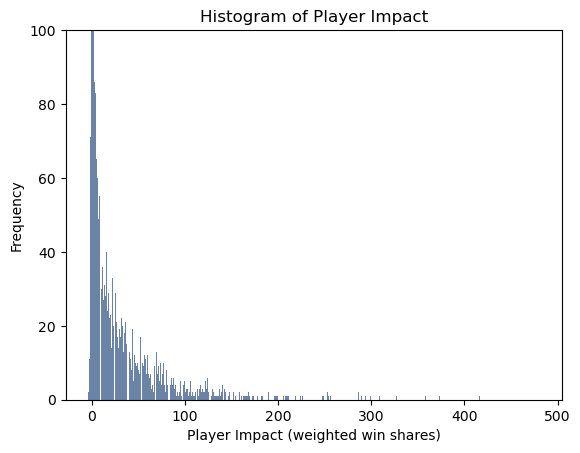

In [5]:
# Round the 'Impact' values to the nearest integer
rounded_impact = career_df['Impact'].round()

# Create the histogram
histWeightedPlayerImpact = thinkstats2.Hist(rounded_impact)

# Plot the histogram
thinkplot.Hist(histWeightedPlayerImpact)
plt.ylim(0, 100)  # Set the y-axis range to focus on 1-100 frequency
plt.title("Histogram of Player Impact")

plt.xlabel('Player Impact (weighted win shares)')
plt.ylabel('Frequency')

# Save the figure
plt.savefig("images/hist-player-impact.png")
# Show the figure
plt.show()

Outliers include players who have negative player impact and players who have extraordinary impact, such as Kareem Abdul-Jabbar, Lebron James, Kobe Bryant, and Michael Jordan. All these outliers are valid and should be incorporated in the analysis. Here is a list of some.

In [7]:
table = tabulate(career_df.head(20), headers=career_df.columns, showindex = False)
drawTable("images\\top_impact.png", table, title = "Top Players By Impact")

table = tabulate(career_df.tail(10), headers=career_df.columns, showindex = False)
drawTable("images\\worst_impact.png", table, title = "Worst Players By Impact")

*************************
* Top Players By Impact *
*************************

Player                 Rank    Impact
-------------------  ------  --------
LeBron James              1     479.7
Kareem Abdul-Jabbar       1     416.5
Michael Jordan            3     372.7
Tim Duncan                1     357.9
Karl Malone              13     327
Shaquille O'Neal          1     309.3
Dirk Nowitzki             9     298.8
John Stockton            16     293.6
Chris Paul                4     289.6
Julius Erving            12     289
Magic Johnson             1     286.5
Kobe Bryant              13     285.8
Kevin Durant              2     272.8
Kevin Garnett             5     259.4
Charles Barkley           5     255.5
Reggie Miller            11     254.1
James Harden              3     253
Hakeem Olajuwon           1     252.6
David Robinson            1     248.8
Moses Malone              0     247.5
***************************
* Worst Players By Impact *
***************************

Player

'***************************\n* Worst Players By Impact *\n***************************\n\nPlayer                  Rank    Impact\n--------------------  ------  --------\nBobby Hurley               7      -1.7\nTony Wroten               25      -1.7\nJosh Jackson               4      -1.8\nMarquis Teague            29      -1.9\nBobby Brown                0      -2\nKenny Satterfield         54      -2.2\nSean Green                41      -2.3\nRodrick Rhodes            24      -2.4\nNikoloz Tskitishvili       5      -2.6\nLancaster Gordon           8      -2.7'

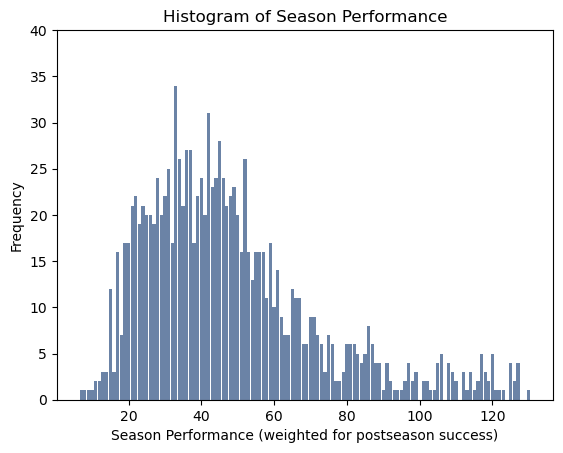

In [8]:
# Connect to SQLite database
conn = sqlite3.connect(FILE_PATH_TO_COMPILED_DATA+'nba_data.db')

season_info_df = pd.read_sql_query('SELECT draft_power, season_performance, performance_cost FROM combined_season', conn)

conn.close()

# Create the histogram
histSeasonPerformance = thinkstats2.Hist(season_info_df['season_performance'])

# Plot the histogram
thinkplot.Hist(histSeasonPerformance)
plt.ylim(0, 40)  # Set the y-axis range to focus on 1-100 frequency
plt.title("Histogram of Season Performance")
# Set the x-axis and y-axis labels
plt.xlabel('Season Performance (weighted for postseason success)')
plt.ylabel('Frequency')

# Save the figure
plt.savefig("images/hist-season-performance.png")
# Show the figure
plt.show()

This histogram shows the performance of every NBA team for every season from 1981 through 2023. It appears to be a normal distribution with a long right skewing which include the most successful teams.

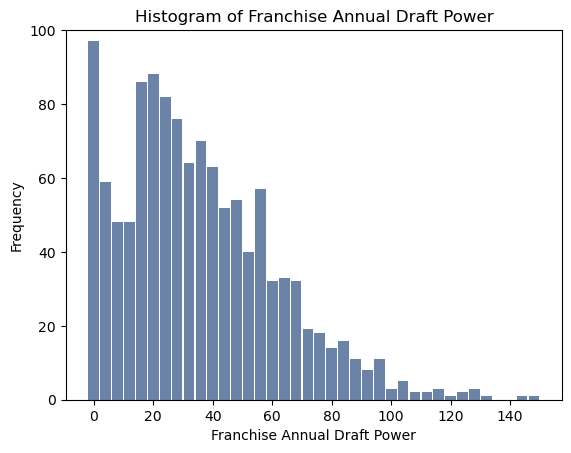

In [9]:
# Round the 'draft_power' values to bins of 4
rounded_draft_power = (season_info_df['draft_power'] / 4).round() * 4

# Create the histogram
histDraftPower = thinkstats2.Hist(rounded_draft_power)

# Plot the histogram
thinkplot.Hist(histDraftPower)
plt.ylim(0, 100)  # Set the y-axis range to focus on 1-100 frequency
plt.title("Histogram of Franchise Annual Draft Power")
plt.xlabel('Franchise Annual Draft Power')
plt.ylabel('Frequency')

# Save the figure
plt.savefig("images/hist-franchise-draft-power.png")
# Show the figure
plt.show()

Annual draft power is a measure of a franchise's power in the draft measured in the potential wins that can be achieved by their sum of picks measured in median player impact, a combination of regular season wins and playoff wins.

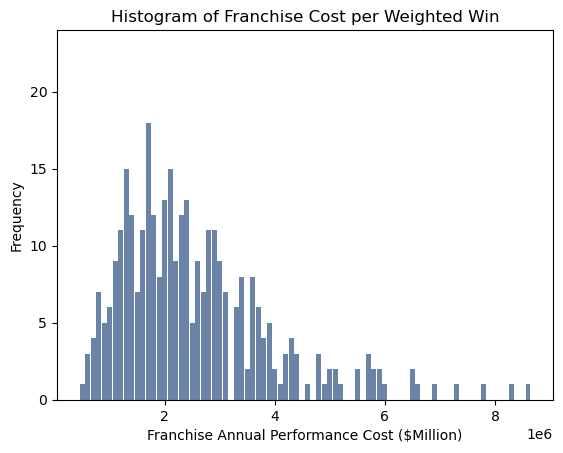

In [10]:
conn = sqlite3.connect(FILE_PATH_TO_COMPILED_DATA+'nba_data.db')

recent_seasons_info_df = pd.read_sql_query("SELECT tm, Year, draft_power, season_performance, Payroll, performance_cost FROM combined_season WHERE Year >= '2012' AND Year <= '2022'", conn)
recent_seasons_info_df = recent_seasons_info_df.sort_values(by=['performance_cost'], ascending=False)
conn.close()

# Round the 'performance_cost' values to bins of a 100000 dollars
rounded_performance_cost = (recent_seasons_info_df['performance_cost'] / 100000).round() * 100000

# Create the histogram
histWeightedWinCost = thinkstats2.Hist(rounded_performance_cost)

# Plot the histogram
thinkplot.Hist(histWeightedWinCost)
plt.ylim(0, 24)  # Set the y-axis range to focus on 1-200 frequency
plt.title("Histogram of Franchise Cost per Weighted Win")

plt.xlabel('Franchise Annual Performance Cost ($Million)')
plt.ylabel('Frequency')

# Save the figure
plt.savefig("images/hist-weighted-win-cost.png")
# Show the figure
plt.show()

When restricted to seasons since the last NBA lockout of 2011-2012, it is evident that the cost of a weighted win share, performance_cost, has increased. Moreover, it is also clear that performance_cost is more dependent on the team's performance than payroll. This can be seen in the following tables.

In [11]:
def printCurrencyFormattedTestStat(value, dec=0):
    format_string = "${:,.{dec}f}"
    return format_string.format(value, dec=dec)

currency_columns = ['Payroll', 'performance_cost']

def formatTable(df):
    formatted_df = df.copy()
    for col in df.columns:
        if col in currency_columns:
            formatted_df[col] = formatted_df[col].map(lambda x: printCurrencyFormattedTestStat(x))
    table = tabulate(formatted_df, headers=df.columns, tablefmt='psql', showindex=False)
    return table

def printTable(df, title):
    table = formatTable(df)
    drawTable("images/"+title+".png", table, title)

printTable(recent_seasons_info_df.head(20), title = "Most Expensive Club Wins Since 2012")
printTable(recent_seasons_info_df.tail(20), title = "Least Expensive Club Wins Since 2012")

***************************************
* Most Expensive Club Wins Since 2012 *
***************************************

+------+--------+---------------+----------------------+--------------+--------------------+
| Tm   |   Year |   draft_power |   season_performance | Payroll      | performance_cost   |
|------+--------+---------------+----------------------+--------------+--------------------|
| GSW  |   2020 |       55.3443 |                   15 | $129,254,928 | $8,616,995         |
| CHA  |   2012 |       56.6886 |                    7 | $57,902,024  | $8,271,718         |
| HOU  |   2021 |       77.94   |                   17 | $131,784,255 | $7,752,015         |
| NYK  |   2019 |       60.6733 |                   17 | $123,387,454 | $7,258,086         |
| CLE  |   2020 |       48.4381 |                   19 | $131,059,022 | $6,897,843         |
| HOU  |   2022 |       76.6014 |                   20 | $132,267,085 | $6,613,354         |
| CLE  |   2019 |       63.5038 |         

In [12]:
# Connect to SQLite database
conn = sqlite3.connect(FILE_PATH_TO_COMPILED_DATA+'nba_data.db')

career_info_df = pd.read_sql_query('SELECT Rank, Impact FROM career', conn)

conn.close()

undrafted_player_count = career_info_df['Rank'].value_counts()[0]
career_summary_draft_df = career_info_df[["Rank", "Impact"]]      

# Divide "Impact" by rank_0_count when Rank is 0
career_summary_draft_df = career_summary_draft_df.assign(median_impact=career_summary_draft_df.apply(lambda row: row['Impact'] / undrafted_player_count if row['Rank'] == 0 else row['Impact']/(FINAL_DRAFT_YEAR - FIRST_YEAR + 1), axis=1))

career_summary_draft_df = career_summary_draft_df.groupby("Rank").sum().reset_index()

table1 = formatTable(career_summary_draft_df.head(21))
table2 = formatTable(career_summary_draft_df[21:41])
table3 = formatTable(career_summary_draft_df[41:61])
combined_table = combineTables(table1, table2, table3)
drawTable("images/Median_Draft_Rank_Impact.png", combined_table, title = "Median Impact of Draft Rank", width = 900)

*******************************
* Median Impact of Draft Rank *
*******************************

+--------+----------+-----------------+ +--------+----------+-----------------+ +--------+----------+-----------------+
|   Rank |   Impact |   median_impact | |   Rank |   Impact |   median_impact | |   Rank |   Impact |   median_impact |
|--------+----------+-----------------| |--------+----------+-----------------| |--------+----------+-----------------|
|      0 |   4190   |          4.5494 | |     21 |   1195.2 |        28.4571  | |     41 |    421.6 |       10.0381   |
|      1 |   5635.1 |        134.169  | |     22 |   1043.5 |        24.8452  | |     42 |    334.8 |        7.97143  |
|      2 |   3204.4 |         76.2952 | |     23 |   1219.7 |        29.0405  | |     43 |    522   |       12.4286   |
|      3 |   3914.3 |         93.1976 | |     24 |   1459   |        34.7381  | |     44 |    266.7 |        6.35     |
|      4 |   3193.2 |         76.0286 | |     25 |    832.1 |  

'*******************************\n* Median Impact of Draft Rank *\n*******************************\n\n+--------+----------+-----------------+ +--------+----------+-----------------+ +--------+----------+-----------------+\n|   Rank |   Impact |   median_impact | |   Rank |   Impact |   median_impact | |   Rank |   Impact |   median_impact |\n|--------+----------+-----------------| |--------+----------+-----------------| |--------+----------+-----------------|\n|      0 |   4190   |          4.5494 | |     21 |   1195.2 |        28.4571  | |     41 |    421.6 |       10.0381   |\n|      1 |   5635.1 |        134.169  | |     22 |   1043.5 |        24.8452  | |     42 |    334.8 |        7.97143  |\n|      2 |   3204.4 |         76.2952 | |     23 |   1219.7 |        29.0405  | |     43 |    522   |       12.4286   |\n|      3 |   3914.3 |         93.1976 | |     24 |   1459   |        34.7381  | |     44 |    266.7 |        6.35     |\n|      4 |   3193.2 |         76.0286 | |     25 | 

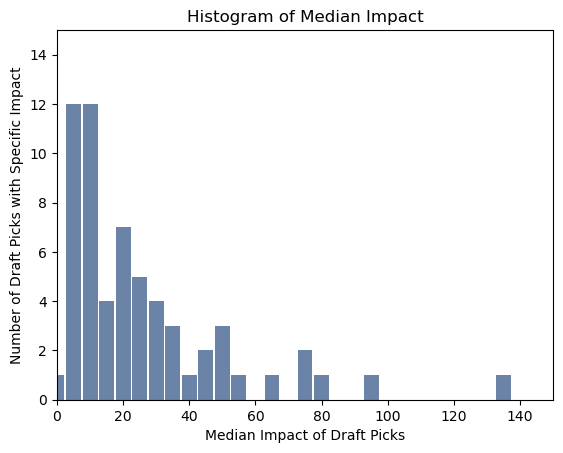

In [13]:
# Round the 'median_impact' values to draft picks
rounded_median_impact = (career_summary_draft_df['median_impact'] / 5).round() * 5

# Create the histogram
histDraftPickValue = thinkstats2.Hist(rounded_median_impact)

# Plot the histogram
thinkplot.Hist(histDraftPickValue)
plt.ylim(0, 15)
plt.xlim(0, 150)

plt.title("Histogram of Median Impact")

plt.xlabel('Median Impact of Draft Picks')
plt.ylabel('Number of Draft Picks with Specific Impact')

# Save the figure
plt.savefig("images/hist-median-impact.png")
# Show the figure
plt.show()

In the graph above it is clear that only a few draft picks have enormous consequences. Most draft picks cluster around 5-25 Median Impact over the career of a player.

In [14]:
pmfWeightedPlayerImpact = thinkstats2.MakePmfFromHist(histWeightedPlayerImpact)
pmfSeasonPerformance = thinkstats2.MakePmfFromHist(histSeasonPerformance)
pmfDraftPower = thinkstats2.MakePmfFromHist(histDraftPower)
pmfWeightedWinCost = thinkstats2.MakePmfFromHist(histWeightedWinCost)
pmfDraftPickValue = thinkstats2.MakePmfFromHist(histDraftPickValue)

## Mean, Mode, Spread, & Tails of 5 variables

In [15]:
# Mean:

drawReport("images/means.png", title = "Mean of Data Frames", text = formatTestStat(thinkstats2.Mean(rounded_impact), dec = 3) + "\n" +
           formatTestStat(thinkstats2.Mean(season_info_df['season_performance']), dec = 3) + "\n" +
           formatTestStat(thinkstats2.Mean(rounded_draft_power), dec = 3) + "\n" +
           formatTestStat(thinkstats2.Mean(season_info_df['performance_cost']), dec = 2) + "\n" +
           formatTestStat(thinkstats2.Mean(career_summary_draft_df['median_impact']), dec = 3) + "\n")

***********************
* Mean of Data Frames *
***********************

21.481
47.994
35.458
1283797.99
25.916



'21.481\n47.994\n35.458\n1283797.99\n25.916\n'

In [16]:
# Mode:

drawReport("images/modes.png", title = "Mode of Data Frames", text = formatTestStat(pmfWeightedPlayerImpact.Mode(), dec = 3) + "\n" +
           formatTestStat(pmfSeasonPerformance.Mode(), dec = 3) + "\n" +
           formatTestStat(pmfDraftPower.Mode(), dec = 3) + "\n" +
           formatTestStat(pmfWeightedWinCost.Mode(), dec = 3) + "\n" +
           formatTestStat(pmfDraftPickValue.Mode(), dec = 3) + "\n")

***********************
* Mode of Data Frames *
***********************

0.000
33.000
0.000
1700000.000
10.000



'0.000\n33.000\n0.000\n1700000.000\n10.000\n'

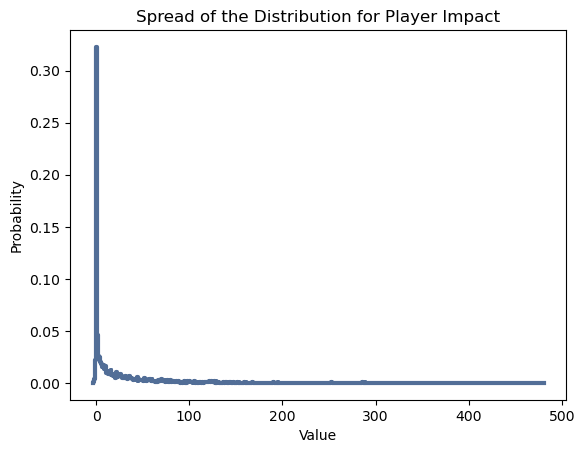

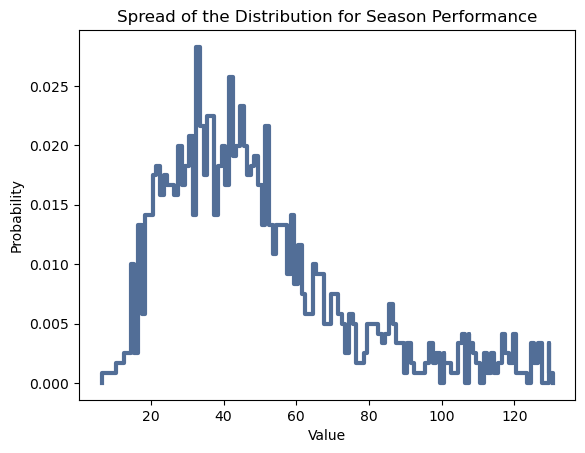

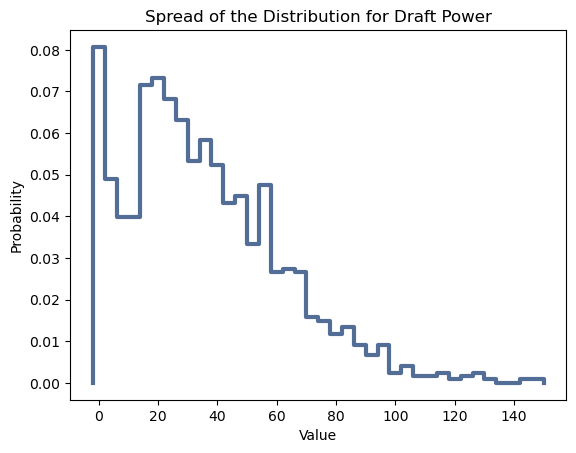

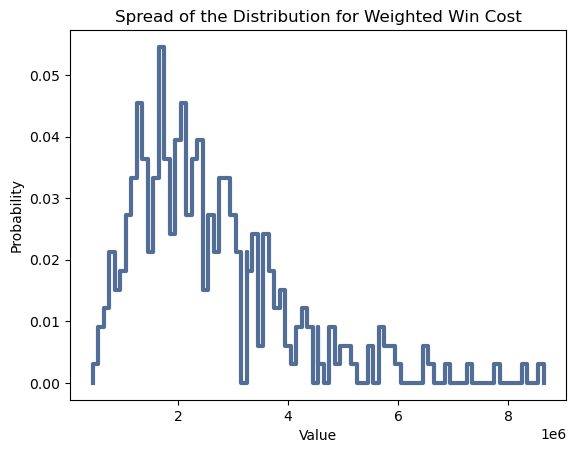

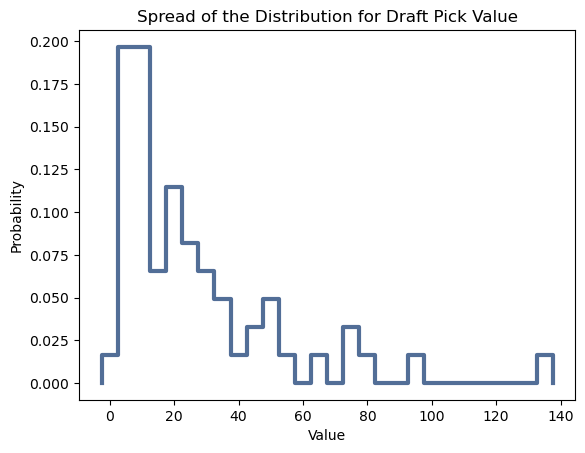

In [17]:
# Spread:

import thinkplot

def showPmf(pmf, title):
    thinkplot.Pmf(pmf)
    plt.title('Spread of the Distribution for '+title)
    plt.xlabel('Value')
    plt.ylabel('Probability')
    # Save the figure
    plt.savefig("images/" + title + ".png")
    # Show the figure
    plt.show()
    
showPmf(pmfWeightedPlayerImpact, "Player Impact")
showPmf(pmfSeasonPerformance, "Season Performance")
showPmf(pmfDraftPower, "Draft Power")
showPmf(pmfWeightedWinCost, "Weighted Win Cost")
showPmf(pmfDraftPickValue, "Draft Pick Value")

In [18]:
# Standard deviation.

drawReport("images/modes.png", title = "Standard Deviation of Data Frames", text = formatTestStat(pmfWeightedPlayerImpact.Std(), dec = 3) + "\n" +
           formatTestStat(pmfSeasonPerformance.Std(), dec = 3) + "\n" +
           formatTestStat(pmfDraftPower.Std(), dec = 3) + "\n" +
           formatTestStat(pmfWeightedWinCost.Std(), dec = 3) + "\n" +
           formatTestStat(pmfDraftPickValue.Std(), dec = 3) + "\n")

*************************************
* Standard Deviation of Data Frames *
*************************************

40.747
24.179
26.081
1391922.289
25.433



'40.747\n24.179\n26.081\n1391922.289\n25.433\n'

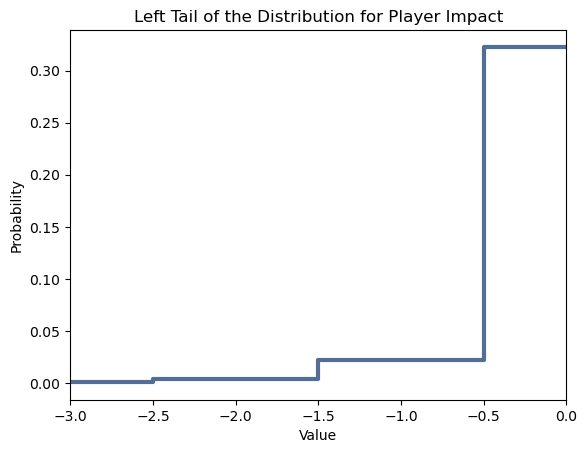

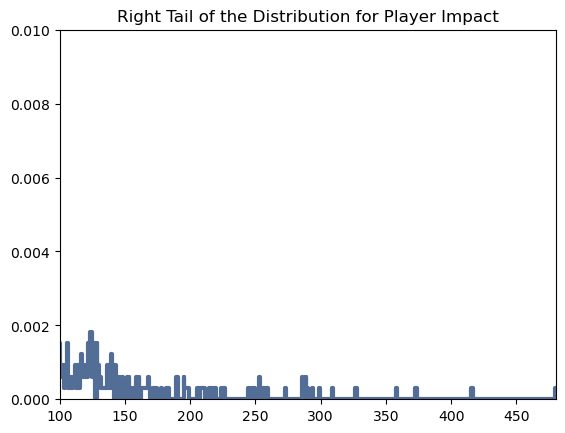

In [55]:
def showTails(pmf, title, cdf, tail_size, rt_lim = None, xlabel = None):
    minimum_value = min(pmf.Values())
    maximum_value = max(pmf.Values())
    thinkplot.Pmf(pmf)
    plt.title('Left Tail of the Distribution for '+title)
    if cdf.Percentile(0) == cdf.Percentile(tail_size):
        plt.axvline(cdf.Percentile(0), color='red')  # Add vertical line at the tail value (e.g., zero)
        plt.xlim(cdf.Percentile(0)-0.01, cdf.Percentile(tail_size) + 0.01)
    else:
        plt.xlim(cdf.Percentile(0), cdf.Percentile(tail_size))
    if not xlabel:
        plt.xlabel('Value')
    else:
        plt.xlabel(xlabel)
    plt.ylabel('Probability')
    plt.savefig("images/"+title + "-left_tail.png")
    plt.show()    
    thinkplot.Pmf(pmf)
    plt.title('Right Tail of the Distribution for '+title)
    if rt_lim:
        plt.ylim(0, rt_lim)
    plt.xlim(cdf.Percentile(100-tail_size), cdf.Percentile(100))  
    # Save the figure
    plt.savefig("images/"+title + "-right_tail.png")
    # Show the figure
    plt.show()    

cdfWeightedPlayerImpact = thinkstats2.MakeCdfFromHist(histWeightedPlayerImpact)
cdfSeasonPerformance = thinkstats2.MakeCdfFromHist(histSeasonPerformance)
cdfDraftPower = thinkstats2.MakeCdfFromHist(histDraftPower)
cdfWeightedWinCost = thinkstats2.MakeCdfFromHist(histWeightedWinCost)
cdfDraftPickValue = thinkstats2.MakeCdfFromHist(histDraftPickValue)

showTails(pmfWeightedPlayerImpact, "Player Impact", cdfWeightedPlayerImpact, 5, rt_lim = 0.01)

The left tail shows the small number of players who actually had a negative impact on their teams over the career. The right tail shows the most extraordinary players. The highest ranked player measured in 'Impact' is LeBron James, the rightmost line around 480.

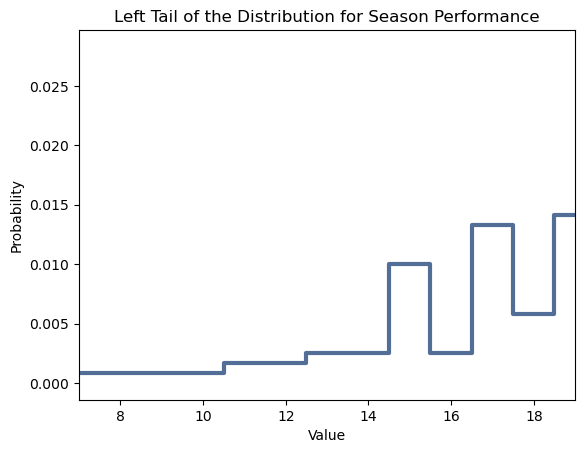

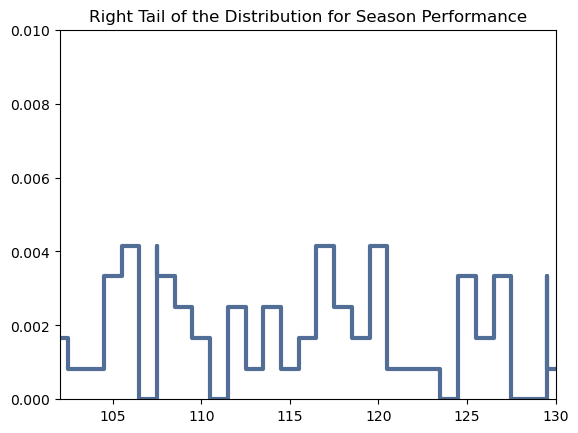

In [20]:
showTails(pmfSeasonPerformance, "Season Performance", cdfSeasonPerformance, 5, rt_lim = 0.01)

The worst teams are on the left tail, while the most extraordinary performers are on the right tail.

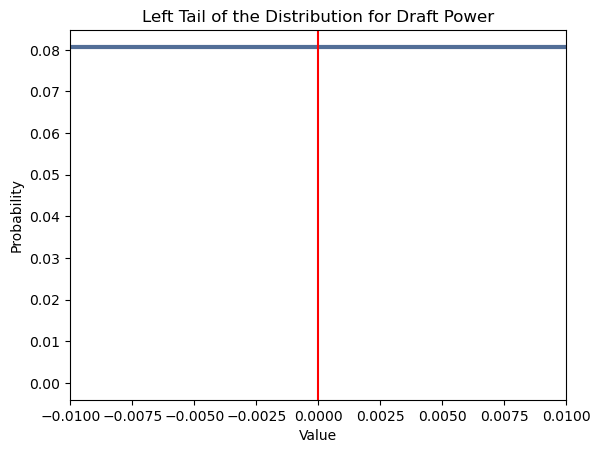

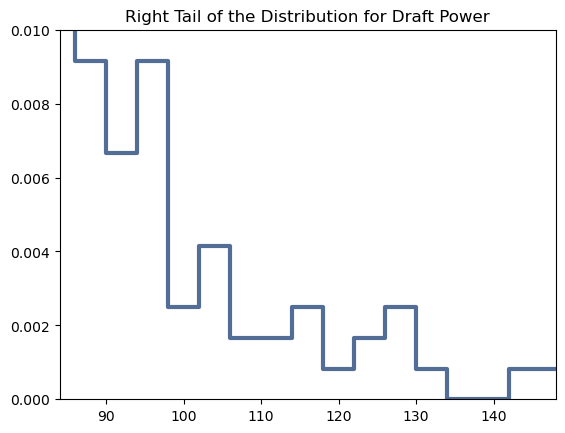

In [21]:
showTails(pmfDraftPower, "Draft Power", cdfDraftPower, 5, rt_lim = 0.01)

In [22]:
drafting_teams_df = recent_seasons_info_df.sort_values(by=['draft_power', 'season_performance'], ascending=False)

printTable(drafting_teams_df.head(20), title = "Most Seasonal Draft Power")
printTable(drafting_teams_df.tail(20), title = "Least Seasonal Draft Power")

*****************************
* Most Seasonal Draft Power *
*****************************

+------+--------+---------------+----------------------+--------------+--------------------+
| Tm   |   Year |   draft_power |   season_performance | Payroll      | performance_cost   |
|------+--------+---------------+----------------------+--------------+--------------------|
| BOS  |   2016 |      125.47   |                   52 | $77,141,919  | $1,483,498         |
| PHI  |   2014 |      117.298  |                   19 | $51,741,312  | $2,723,227         |
| NHH  |   2012 |      106.752  |                   21 | $65,441,008  | $3,116,238         |
| CLE  |   2013 |      105.066  |                   24 | $54,472,190  | $2,269,675         |
| PHO  |   2018 |      101.274  |                   21 | $92,684,083  | $4,413,528         |
| PHI  |   2016 |       98.1833 |                   10 | $64,583,220  | $6,458,322         |
| MIN  |   2020 |       95.941  |                   19 | $114,202,982 | 

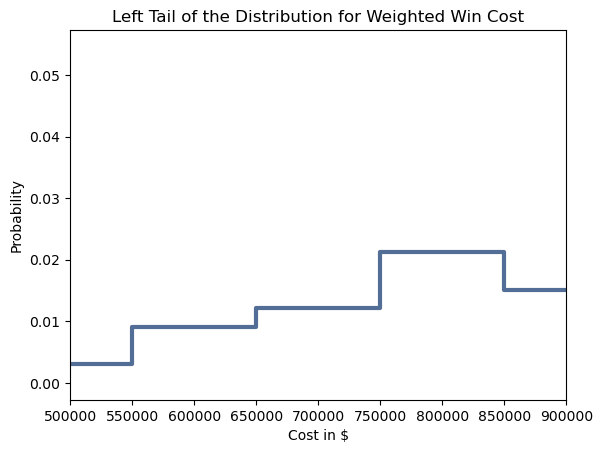

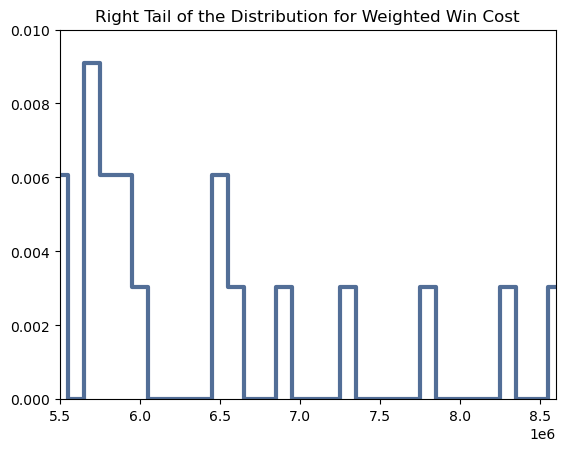

In [23]:
showTails(pmfWeightedWinCost, "Weighted Win Cost", cdfWeightedWinCost, 5, rt_lim = 0.01, xlabel = "Cost in $")

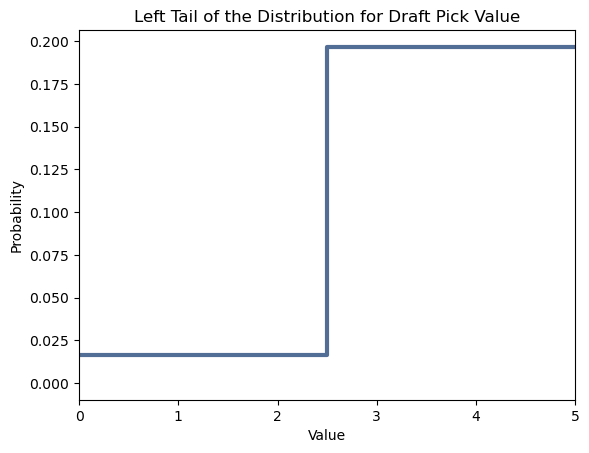

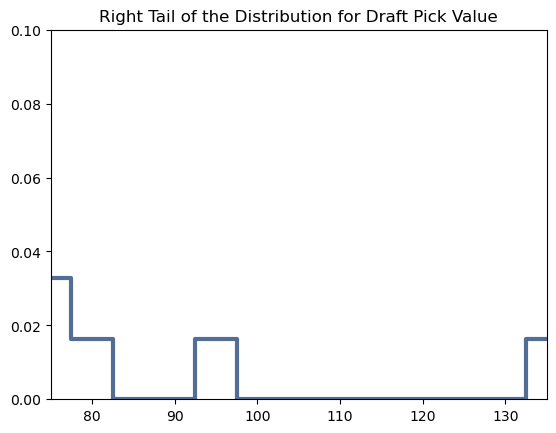

In [24]:
showTails(pmfDraftPickValue, "Draft Pick Value", cdfDraftPickValue, 5, rt_lim = 0.1)

There are a number of teams every season who have no draft pick, usually because it has been traded. There are so many that the entire lower bound is larger than the specified tail, so I drew a single line at 0. For the right tail, there are teams who have accumulated picks. These are more unusual, because the first few picks are highly coveted.

## Use a PMF to break out some of the data based on criteria.

I will exclude the 5 highest payrolls for every season to determine the front offices who were most successful with their seasons without spending the most money. I will also show the best performing teams and those that spent the most money in contrast.

************************
* Most Expensive Teams *
************************

+------+--------+---------------+----------------------+--------------+--------------------+
| Tm   |   Year |   draft_power |   season_performance | Payroll      | performance_cost   |
|------+--------+---------------+----------------------+--------------+--------------------|
| GSW  |   2022 |      19.9205  |                  113 | $178,980,766 | $1,583,901         |
| BRK  |   2022 |       0       |                   44 | $174,811,922 | $3,972,998         |
| GSW  |   2021 |      58.8686  |                   39 | $171,105,334 | $4,387,316         |
| BRK  |   2021 |      27.6224  |                   65 | $170,444,633 | $2,622,225         |
| LAC  |   2022 |       6.83714 |                   42 | $168,378,382 | $4,009,009         |
| LAL  |   2022 |       7.62238 |                   33 | $164,409,293 | $4,982,100         |
| MIL  |   2022 |      15.3557  |                   68 | $160,875,421 | $2,365,815     

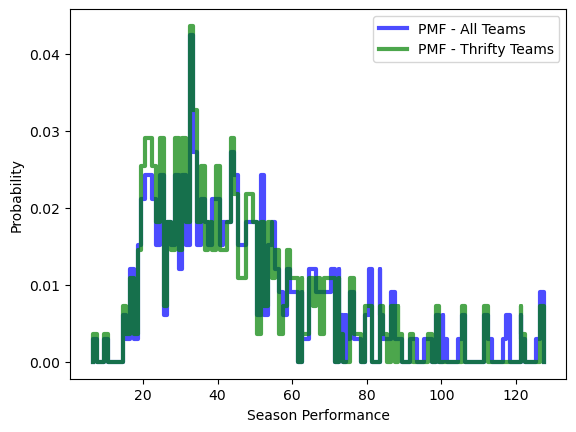

<Figure size 800x600 with 0 Axes>

In [31]:
# Sort the DataFrame by Year and Payroll in descending order
sorted_df = recent_seasons_info_df.copy()
sorted_df = sorted_df.sort_values(by=['Year', 'Payroll'], ascending=[True, False])
pmf_recent_seasons = thinkstats2.Pmf(recent_seasons_info_df['season_performance'])                                                    

# Group the sorted DataFrame by Year and apply a function to exclude the top 5 rows
excluded_df = sorted_df.groupby('Year').apply(lambda x: x.iloc[5:])
thriftyTeams_df = excluded_df.sort_values(by=['season_performance'], ascending=False)

paying_df = recent_seasons_info_df.copy()
paying_df = paying_df.sort_values(by=['Payroll', 'Year'], ascending=[False, True])

performing_df = recent_seasons_info_df.copy()
performing_df = performing_df.sort_values(by=['season_performance', 'Year'], ascending=[False, True])

# print table of all teams sorted by season_performance
printTable(paying_df.head(20), title = "Most Expensive Teams")

# print table of all teams sorted by season_performance
printTable(performing_df.head(20), title = "Best Performing Teams")

# Calculate the PMF of the remaining season_performance values
pmfThriftyTeams = thinkstats2.Pmf(thriftyTeams_df['season_performance'])

printTable(excluded_df.head(20), title = "Best Performance of Thrifty Teams")

# Set up the plot
thinkplot.PrePlot(2)  # Set the number of plots to 2

# Plot the first PMF
thinkplot.Pmf(pmf_recent_seasons, color='blue', label='PMF - All Teams')

# Plot the second PMF
thinkplot.Pmf(pmfThriftyTeams, color='green', label='PMF - Thrifty Teams')

# Customize the plot
thinkplot.Config(xlabel='Season Performance', ylabel='Probability', legend=True)

# Show the plot
thinkplot.save("images/pmf-thrifty-vs-all")
thinkplot.Show()

While thrifty teams concentrate at the median season performance, there have been some with notable success.

## Create a CDF for one of the variables:

We have already defined cdfImpact, cdfSeasonPerformance, cdfDraftPower, cdfWeightedWinCost, and cdfDraftPickValue.

We will do the same now without the top 5 spenders.

In [32]:
histThriftyTeams = thinkstats2.Hist(thriftyTeams_df['season_performance'])
cdfThriftyTeams = thinkstats2.MakeCdfFromHist(histThriftyTeams)

text = "Mean: " + formatTestStat(thinkstats2.Mean(thriftyTeams_df['season_performance']), dec = 3)
text += "\n"
text += "Mode: " + formatTestStat(pmfThriftyTeams.Mode(), dec = 3)
text += "\n"
text += "Standard Deviation: " + formatTestStat(pmfThriftyTeams.Std(), dec = 3)
text += "\n"

drawReport("images/thrifty-team-cdf-stats.png", text, title = "Variables of Thrifty Season Performance")

*******************************************
* Variables of Thrifty Season Performance *
*******************************************

Mean: 44.033
Mode: 33.000
Standard Deviation: 21.657



'Mean: 44.033\nMode: 33.000\nStandard Deviation: 21.657\n'

In [33]:
drawReport("images/recent-season-cdf-stats.png", title = "For Comparison: Variables of All Recent Season Performances", 
         text = "Mean: " +formatTestStat(thinkstats2.Mean(recent_seasons_info_df['season_performance']), dec = 3) + "\n" + 
                "Mode: " + formatTestStat(pmf_recent_seasons.Mode(), dec = 3) + "\n" + 
                "Standard Deviation: " + formatTestStat(pmf_recent_seasons.Std(), dec = 3) + "\n")

***************************************************************
* For Comparison: Variables of All Recent Season Performances *
***************************************************************

Mean: 47.182
Mode: 33.000
Standard Deviation: 23.937



'Mean: 47.182\nMode: 33.000\nStandard Deviation: 23.937\n'

## Plot 1 analytical distribution. Chapter 5. (normal, lognormal, pareto)

For this, we will use the Season_Performance variable.

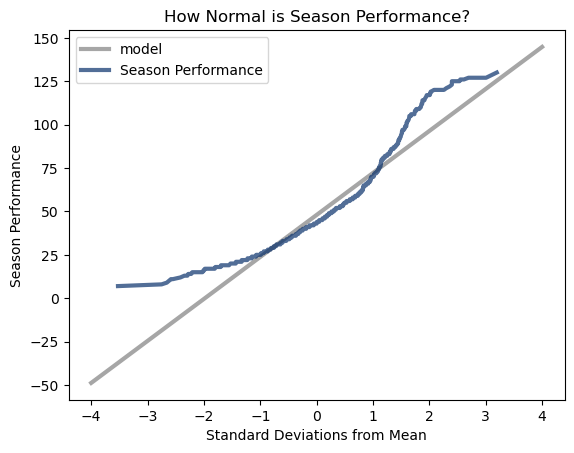

In [35]:
def MakeNormalPlot(season_performance):
    mean = season_performance.mean()
    std = season_performance.std()
    xs = [-4, 4]
    plt.title('How Normal is Season Performance?')
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)    
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    xs, ys = thinkstats2.NormalProbability(season_performance)
    thinkplot.Plot(xs, ys, label='Season Performance')
    thinkplot.Config(xlabel='Standard Deviations from Mean', ylabel='Season Performance', legend=True)
    plt.savefig("images/normal_season_performance.png")
    
MakeNormalPlot(season_info_df["season_performance"])

Not very normal!

In a standard normal distribution, approximately 68% of the data falls within one standard deviation of the mean, and approximately 95% falls within two standard deviations. The grey plotted line above represents a normal distribution, whereas the observed data varies greatly from normal.

Writing images/season_performance_cdf.png.png


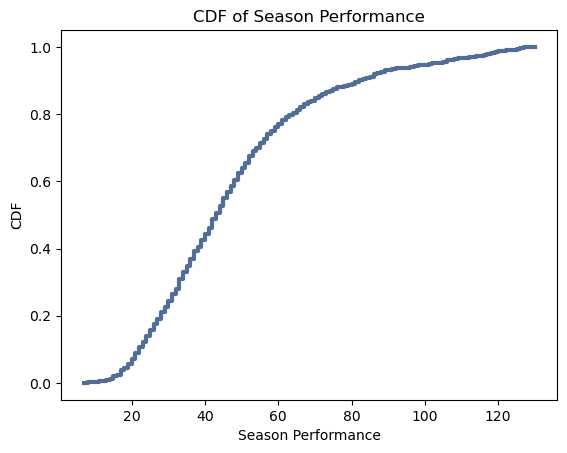

***************************************
* Report of CDF of Season Performance *
***************************************

25th Percentile: 31.000
Mean: 47.994
75th Percentile: 59.000
Estimated Std Deviation: 16.568
Skew: 0.301
Pearson's Skew: 2.715
Fraction Below Mean: 58.652



<Figure size 800x600 with 0 Axes>

In [36]:
NORMALIZED_DISTRIBUTION_ESTIMATE_SD = 1.3

def Pearson_skewness(cdf, pmf):
    mode = pmf.Mode()

    # Calculate the mean and standard deviation
    mean = cdf.Mean()
    q1 = cdf.Percentile(25)
    q3 = cdf.Percentile(75)
    # estimate the standard deviation from the CDF
    iqr = (q3 - q1) / NORMALIZED_DISTRIBUTION_ESTIMATE_SD
    std = iqr / NORMALIZED_DISTRIBUTION_ESTIMATE_SD

    # Calculate Pearson's skewness
    skewness = 3 * (mean - mode) / std
    return skewness


def examineSeasonPerformance(season_performance, log_option):

    if log_option:
        season_performance = np.log10(season_performance)
        
    # make a cdf & pmf of the data
    cdf = thinkstats2.Cdf(season_performance)
    pmf = thinkstats2.Pmf(season_performance)

    if log_option:
        report_png_name = "images/season_performance_log_cdf_report.png"
        png_name = "images/season_performance_log_cdf.png"
        xlabel = "Log of Season Performance"
        title = "CDF of Log of Season Performance"
    else:
        report_png_name = "images/season_performance_cdf_report.png"
        png_name = "images/season_performance_cdf.png"
        xlabel = "Season Performance"
        title = "CDF of Season Performance"

    plt.title(title)
    # plot it.
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=xlabel,
               ylabel='CDF')

    # Show the plot
    thinkplot.save(png_name, ["png"])
    thinkplot.Show()
        
    # Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. 
    q1 = cdf.Percentile(25)
    median = cdf.Percentile(50)
    q3 = cdf.Percentile(75)
    mean = pmf.Mean()

    # estimate the standard deviation from the CDF
    iqr = (q3 - q1) / NORMALIZED_DISTRIBUTION_ESTIMATE_SD
    std = iqr / NORMALIZED_DISTRIBUTION_ESTIMATE_SD

    # compute the skewness
    skew = (mean - median) / std
    
    # and now Pearson's skewness.
    pearsons_skew = Pearson_skewness(cdf, pmf)
    
    # What fraction of teams have as seasonal performance below the mean? 
    fraction_below_mean = cdf.PercentileRank(mean)
    
    # show report
    drawReport(report_png_name, title = "Report of " + title, 
         text = "25th Percentile: " + formatTestStat(q1, dec = 3) + "\n" + 
               "Mean: " + formatTestStat(mean, dec = 3) + "\n" +
               "75th Percentile: " + formatTestStat(q3, dec = 3) + "\n" +
               "Estimated Std Deviation: " + formatTestStat(std, dec = 3) + "\n" +
               "Skew: " + formatTestStat(skew, dec = 3) + "\n" +
               "Pearson's Skew: " + formatTestStat(pearsons_skew, dec = 3) + "\n" +
               "Fraction Below Mean: " + formatTestStat(fraction_below_mean, dec = 3) + "\n")

examineSeasonPerformance(season_info_df["season_performance"], False)

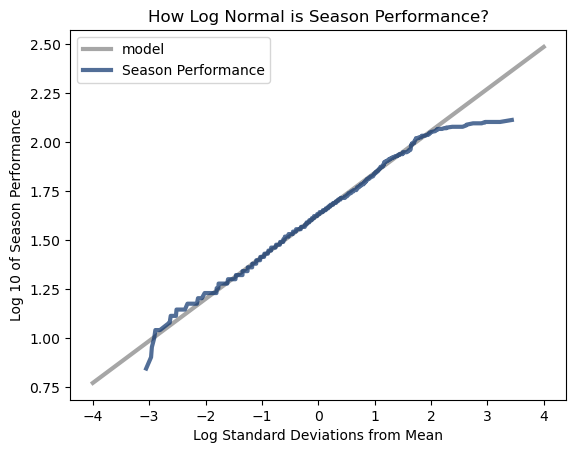

In [38]:
def MakeLogNormalPlot(season_performance):
    log_x = np.log10(season_performance)
    mean = log_x.mean()
    std = log_x.std()
    xs = [-4, 4]
    plt.title('How Log Normal is Season Performance?')
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)    
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    xs, ys = thinkstats2.NormalProbability(log_x)
    thinkplot.Plot(xs, ys, label='Season Performance')
    thinkplot.Config(xlabel='Log Standard Deviations from Mean', ylabel='Log 10 of Season Performance', legend=True)
    plt.savefig("images/log_normal_season_performance.png")

MakeLogNormalPlot(season_info_df["season_performance"])

The log of the season performance agrees with the normal model across almost 4 standard deviations from -2 to 2.

Writing images/season_performance_log_cdf.png.png


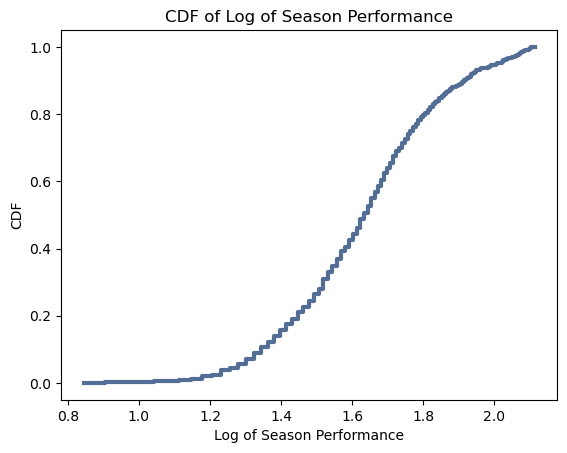

**********************************************
* Report of CDF of Log of Season Performance *
**********************************************

25th Percentile: 1.491
Mean: 1.629
75th Percentile: 1.771
Estimated Std Deviation: 0.165
Skew: -0.025
Pearson's Skew: 2.009
Fraction Below Mean: 48.669



<Figure size 800x600 with 0 Axes>

In [39]:
examineSeasonPerformance(season_info_df["season_performance"], True)

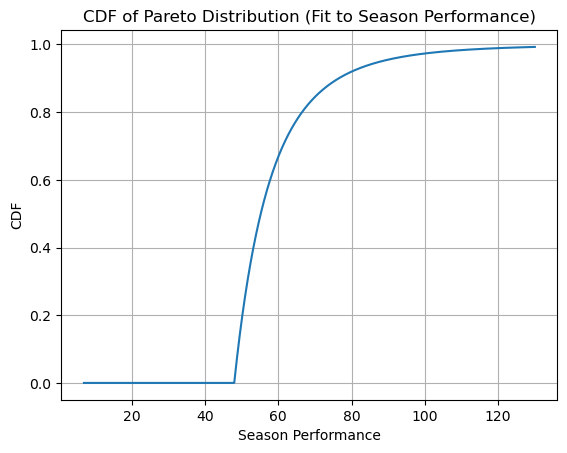

In [40]:
from scipy.stats import pareto

def PlotParetoCDF(data):
    # Estimate parameters using method of moments
    mean = data.mean()
    std = data.std()
    shape = 1 + (mean/std)**2
    
    # Generate points for CDF plot
    x = np.linspace(data.min(), data.max(), 1000)
    y = pareto.cdf(x, shape, scale=mean)
    
    # Plot CDF
    plt.plot(x, y)
    plt.xlabel('Season Performance')
    plt.ylabel('CDF')
    plt.title('CDF of Pareto Distribution (Fit to Season Performance)')
    plt.grid(True)
    plt.savefig("images/cdf_of_pareto_season_performance")
    plt.show()

PlotParetoCDF(season_info_df["season_performance"])

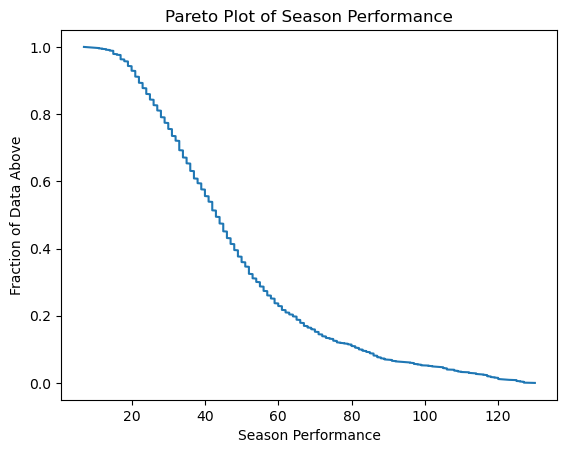

In [41]:
def MakeParetoPlot(season_performance):
    sorted_data = np.sort(season_performance)
    y_vals = 1 - np.arange(len(sorted_data)) / float(len(sorted_data) - 1)
    
    plt.title('Pareto Plot of Season Performance')
    plt.plot(sorted_data, y_vals)
    plt.xlabel('Season Performance')
    plt.ylabel('Fraction of Data Above')
    plt.savefig("images/pareto_season_performance.png")

MakeParetoPlot(season_info_df["season_performance"])

The question of the effectiveness of the draft has good empirical evidence, but there are substantial questions on the degree of its effectiveness. Some teams sacrifice an entire season to achieve a good draft pick.

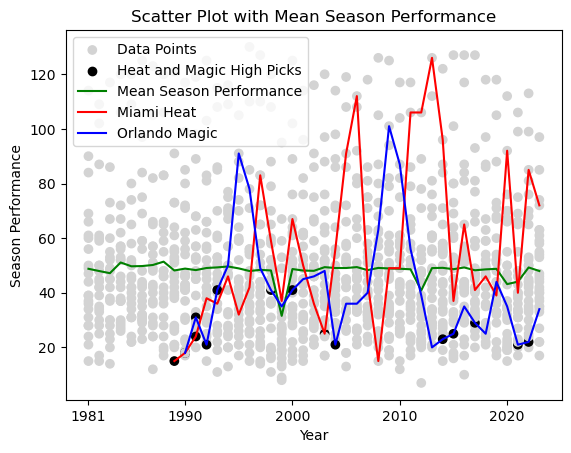

In [42]:
# Connect to SQLite database
conn = sqlite3.connect(FILE_PATH_TO_COMPILED_DATA + 'nba_data.db')

season_info_df = pd.read_sql_query('SELECT franchise_id, draft_power, season_performance, Year, adjusted_year, performance_cost FROM combined_season', conn)

conn.close()

x_values = np.array(season_info_df['adjusted_year'])
y_values = np.array(season_info_df['season_performance'])

mean_season_performance = season_info_df.groupby('adjusted_year')['season_performance'].mean()

# Define the colors for franchise_id 16 and franchise_id 22
colors = ['lightgrey' if ((fid != 16 and fid != 22) or dp < 50) else 'black' for fid, dp in zip(season_info_df['franchise_id'], season_info_df['draft_power'])]

# franchise_id 16 = red, franchise_id 22 = blue, otherwise grey. Black dots are top picks.
plt.scatter(x_values, y_values, c=colors, label='Data Points')

# Create a scatter plot with a single black data point
plt.scatter([], [], color='black', label='Heat and Magic High Picks')

# Set the tick values and labels
plt.xticks([0, 9, 19, 29, 39], map(str, [1981, 1990, 2000, 2010, 2020]))

plt.plot(mean_season_performance.index, mean_season_performance.values, color='green', label='Mean Season Performance')

# Plot color lines for franchise 16 and franchise 22
franchise_16_data = season_info_df[season_info_df['franchise_id'] == 16]
franchise_22_data = season_info_df[season_info_df['franchise_id'] == 22]

plt.plot(franchise_16_data['adjusted_year'], franchise_16_data['season_performance'], color='red', label='Miami Heat')
plt.plot(franchise_22_data['adjusted_year'], franchise_22_data['season_performance'], color='blue', label='Orlando Magic')

plt.xlabel('Year')
plt.ylabel('Season Performance')
plt.title('Scatter Plot with Mean Season Performance')
plt.legend()
plt.savefig("images/scatterplot_2_expansion_teams.png")
plt.show()

The Orlando Magic's successful seasons follows the drafting of Shaquille O'Neal and later Dwight Howard. The Miami Heat's period in 2003 mirrors the drafting of Dwyane Wade.

To test the effectiveness of the draft I will compare two variables, draft_power and season_performance, but the impact of the draft is subsequent to the draft. That is, the 2001 draft would be expected to improve the 2002 and 2003 teams. Therefore, I will also introduce a lag factor.

In [43]:
# Connect to the database
conn = sqlite3.connect(FILE_PATH_TO_COMPILED_DATA + 'nba_data.db')

# Query the tables
query = "SELECT franchise_id, Team, Year, season_performance, draft_power FROM combined_season"
modeling_df = pd.read_sql_query(query, conn)

# Convert franchise_id column to float and then to int
modeling_df['franchise_id'] = modeling_df['franchise_id'].astype(float).astype(int)

# Sort the DataFrame by franchise_id and Year
modeling_df.sort_values(['franchise_id', 'Year'], inplace=True)

# Define the new columns
modeling_columns = ['franchise_id', 'Team', 'Year', 
                    'season_performance', 'sp_minus_1', 'sp_minus_2', 'sp_minus_3',
                    'draft_power', 'dp_minus_1', 'dp_minus_2', 'dp_minus_3']


def add_previous_seasons(group):
    shifted_values1 = pd.concat([group['season_performance'].shift(i, fill_value=np.nan) for i in range(1, 4)], axis=1)
    shifted_values1.columns = [f'sp_minus_{i}' for i in range(1, 4)]
    
    shifted_values2 = pd.concat([group['draft_power'].shift(i, fill_value=np.nan) for i in range(1, 4)], axis=1)
    shifted_values2.columns = [f'dp_minus_{i}' for i in range(1, 4)]
    
    group = pd.concat([group, shifted_values1, shifted_values2], axis=1)
    return group


# Apply the function to each group
modeling_df = modeling_df.groupby('franchise_id', group_keys=False).apply(add_previous_seasons)

# Reset the index
modeling_df.reset_index(drop=True, inplace=True)

modeling_df = modeling_df.assign(adjusted_sp=modeling_df['season_performance'] + modeling_df['sp_minus_1']**(3/5) + 
                                 modeling_df['sp_minus_2']**(1/2) + modeling_df['sp_minus_3']**(1/2))
modeling_df = modeling_df.assign(adjusted_dp=modeling_df['draft_power'] + modeling_df['dp_minus_1']**(3/5) + 
                                 modeling_df['dp_minus_2']**(1/2) + modeling_df['dp_minus_3']**(1/2))

nonzero_mask = modeling_df['adjusted_dp'] != 0
min_nonzero = np.min(modeling_df.loc[nonzero_mask, 'adjusted_dp'])
adjusted_dp = np.where(nonzero_mask, modeling_df['adjusted_dp'], min_nonzero)
modeling_df['log_adjusted_dp'] = np.log10(adjusted_dp)

modeling_df = modeling_df.assign(adjusted_year=modeling_df['Year'] - FIRST_YEAR)
modeling_df = modeling_df.assign(adjusted_year2=modeling_df['adjusted_year']**2)

modeling_columns.append('adjusted_sp')
modeling_columns.append('adjusted_dp')
modeling_columns.append('adjusted_year')
modeling_columns.append('adjusted_year2')

# Close the connection
conn.close()

modeling_df.to_csv(FILE_PATH_TO_COMPILED_DATA+"lagged_team_performance.csv", index=False)

# Remove the first few seasons of every franchise where 'sp_minus_3' is NaN
modeling_df.dropna(subset=['sp_minus_3'], inplace=True)

modeling_df.to_csv(FILE_PATH_TO_COMPILED_DATA+"truncated_lagged_team_performance.csv", index=False)

## Correlation

Investigate the correlation between Season_Performance and Draft_Power.
Known: Teams gain more draft power by having lower Season_Performance unless they trade their draft picks.
Expected: After teams have high draft power, their Season_Performance will improve.

First, set up a data frame that describes the model, including lagging variables for draft power and season performance.

## Description of Modeling_DF 

* franchise_id: Unique identifier of franchise that follows a team through name and city changes. It is an integer. Example: 1.
* Team: The official name of the franchise. For example: Atlanta Hawks.
* Year: The ending year of the given season. For the first year of the model, 1983-1984, Year would be 1984.
* season_performance: Team wins plus weighted postseason wins depending on playoff round. For example, 44.
* draft_power: The sum of median career weighted win shares of all players drafted at the ranks for that season. For example, 51.3.
* sp_minus_1: Season performance of previous season.
* sp_minus_2: Season performance two seasons before.
* sp_minus_3: Season performance three seasons before.
* dp_minus_1: Draft power of previous season.
* dp_minus_2: Draft power two seasons before.
* dp_minus_3: Draft power three seasons before.

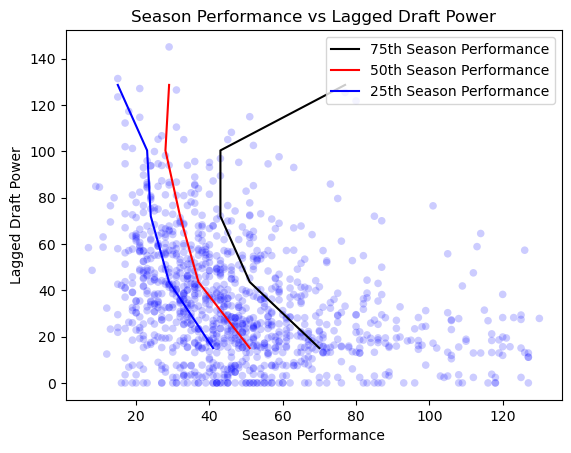

****************************************************
* Correlation of Season Performance vs Draft Power *
****************************************************

Pearson's correlation of Season Performance vs Draft Power: -0.338774
Spearman's correlation coefficient of Season Performance vs Draft Power:-0.383885


"Pearson's correlation of Season Performance vs Draft Power: -0.338774\nSpearman's correlation coefficient of Season Performance vs Draft Power:-0.383885"

<Figure size 800x600 with 0 Axes>

In [44]:
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
import numpy as np
import thinkplot
import thinkstats2

# plot it.
thinkplot.scatter(modeling_df.season_performance, modeling_df.dp_minus_1)

# get bins for dp_minus_1
lagged_dp_bins = np.arange(0, 150, 30)
indices_dp = np.digitize(modeling_df.dp_minus_1, lagged_dp_bins)
groups_dp = modeling_df.groupby(indices_dp)
dps = [group_dp.dp_minus_1.mean() for i, group_dp in groups_dp]

# create Cdf for percentiles of season performance.
cdf_sp = [thinkstats2.Cdf(group_dp.season_performance) for i, group_dp in groups_dp]

thinkplot.Config(title="Season Performance vs Lagged Draft Power",
                 ylabel="Lagged Draft Power",
                 xlabel="Season Performance",
                 legend=True)

colors = ['black', 'red', 'blue']  # Specify colors for each percentile line

for i, percent in enumerate([75, 50, 25]):
    season_performances = [cdf.Percentile(percent) for cdf in cdf_sp]
    label = '%dth Season Performance' % percent
    plt.plot(season_performances, dps, label=label, color=colors[i])

plt.savefig("images/season_performance_vs_lagged_draft_power.png")
thinkplot.Show()

pearsons_correlation, pval = pearsonr(modeling_df.season_performance, modeling_df.dp_minus_1)

# calculate Spearman's correlation coefficient and p-value
spearmans_correlation, pval = spearmanr(modeling_df.season_performance, modeling_df.dp_minus_1)

# print the results
drawReport("images/sp_vs_dp_correlation_report.png", title="Correlation of Season Performance vs Draft Power",
           text="Pearson's correlation of Season Performance vs Draft Power: " + formatTestStat(pearsons_correlation) + "\n" +
                "Spearman's correlation coefficient of Season Performance vs Draft Power:" + formatTestStat(
               spearmans_correlation))

## Analysis of Correlation and Causation.

A negative correlation suggests that as the Draft Power increases (median impact of players drafted), the Season Performance tends to decrease, however there are exceptions, especially when poor performing teams trade their picks to successful teams. It is clear that teams with higher draft power may not immediately achieve higher performance in the league. Note that this is expected because teams rarely have rapid improvements after drafting high. It takes time for players to find their place on a team and make an impact.

Correlation coefficients provide a measure of the linear relationship between two variables, but they do not imply causation. Other factors not considered in this analysis may influence Season Performance. These include team management, coaching, player development, and overall team strategies.

Additionally, the strength of the correlation (-0.3388 and -0.3839) suggests only a moderate relationship, not strong enough to make definitive conclusions.

## Add a Second Season of Lagging

To account for team fit I will add a second season to the equation and take a weighted mean to emphasize the draft two seasons prior to the season.

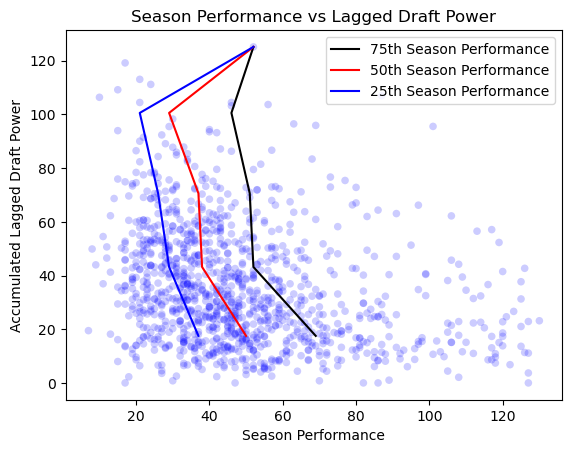

****************************************************
* Correlation of Season Performance vs Draft Power *
****************************************************

Pearson's correlation of Season Performance vs Draft Power: -0.278102
Spearman's correlation coefficient of Season Performance vs Draft Power: -0.309874


"Pearson's correlation of Season Performance vs Draft Power: -0.278102\nSpearman's correlation coefficient of Season Performance vs Draft Power: -0.309874"

<Figure size 800x600 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt

# Calculate the lagged draft power as the average of dp_minus_1 and 2 * dp_minus_2 divided by 3
modeling_df["lagged_draft_power2"] = (modeling_df['dp_minus_1'] + 2 * modeling_df['dp_minus_2']) / 3

thinkplot.scatter(modeling_df.season_performance, modeling_df["lagged_draft_power2"])
thinkplot.config(xlabel="Season Performance", ylabel="Accumulated Lagged Draft Power")

# Get bins for lagged draft power
lagged_dp_bins = np.arange(0, 150, 30)
indices_dp = np.digitize(modeling_df["lagged_draft_power2"], lagged_dp_bins)
groups_dp = modeling_df.groupby(indices_dp)
dps = [group_dp.lagged_draft_power2.mean() for i, group_dp in groups_dp]

# Create Cdf for percentiles of season performance
cdf_sp = [thinkstats2.Cdf(group_dp.season_performance) for i, group_dp in groups_dp]

thinkplot.Config(
    title="Season Performance vs Lagged Draft Power",
    ylabel="Accumulated Lagged Draft Power",
    xlabel="Season Performance",
    legend=True
)

colors = ['black', 'red', 'blue']  # Specify colors for each percentile line
for i, percent in enumerate([75, 50, 25]):
    season_performances = [cdf.Value(percent / 100) for cdf in cdf_sp]
    label = f"{percent}th Season Performance"
    plt.plot(season_performances, dps, label=label, color=colors[i])

plt.savefig("images/season_performance_vs_lagged_draft_power2.png")
thinkplot.Show()

# Calculate Pearson's correlation coefficient and p-value
pearsons_correlation, _ = pearsonr(modeling_df.season_performance, modeling_df.lagged_draft_power2)

# Calculate Spearman's correlation coefficient and p-value
spearmans_correlation, _ = spearmanr(modeling_df.season_performance, modeling_df.lagged_draft_power2)

# Print the results
drawReport(
    "images/sp_vs_dp_correlation_report2.png",
    title="Correlation of Season Performance vs Draft Power",
    text="Pearson's correlation of Season Performance vs Draft Power: "
    + formatTestStat(pearsons_correlation)
    + "\n"
    + "Spearman's correlation coefficient of Season Performance vs Draft Power: "
    + formatTestStat(spearmans_correlation)
)

## Hypothesis Test - "Player Impact ~ Years of Service + Draft Rank"

* Null hypothesis (H₀): There is no significant relationship between years of service and draft rank on win shares.
* Alternative hypothesis (H₁): There is a significant relationship between years of service and draft rank on win shares.
* Plan: Perform the multiple linear regression analysis:

Use the dependent variable "Win shares" and the independent variables "Years of service" and "Draft rank" to build the model.
Fit the model to the data using a suitable regression algorithm. I will use OLS, ordinary least squares. "Years of Service" also needs to be attenuated after players are out of their prime. I will use age 30 to begin an exponential reduction.

I modified the model to use log_rank rather than rank, because a linear relationship was not seen. The model improved somewhat.

* Analyze the p-values associated with the coefficients of the independent variables.

If the p-value is less than your chosen significance level (e.g., 0.05), reject the null hypothesis and conclude that there is a significant relationship between the independent variables and win shares.

* Evaluate the overall goodness of fit of the model:

Examine the R-squared and adjusted R-squared values to understand how well the independent variables explain the variation in win shares.

Use the F-test to assess the overall significance of the model. If the p-value for the F-test is below your significance level, it indicates that the model as a whole is significant.

* Interpret the results:

If the null hypothesis is rejected, it suggests that years of service and/or draft rank significantly impact win shares. Analyze the coefficients of the independent variables to understand the direction and magnitude of the relationship. A positive coefficient indicates a positive impact on win shares, while a negative coefficient suggests a negative impact.

I will also check the assumptions of linear regression, such as linearity, independence, homoscedasticity, and normality of residuals.


## First, Prepare the Data Frame

One record for each season per player.

* player_id (unique id)
* Player (name of player)
* Rank (rank of draft)
* Year Drafted (year of draft)
* Age (age during season)
* Team (team of season, may have multiple records in same season)
* MP RS (minutes played during regular season)
* OWS RS (offensive win shares during regular season)
* DWS RS (defensive win shares during regular season)
* WS RS (all win shares during regular season)
* WS/48 RS (all win shares per 48 minutes during regular season)
* Year (year season ends)
* MP PO (minutes played during playoffs)
* OWS PO (offensive win shares during playoffs)
* DWS PO (defensive win shares during playoffs)
* WS PO (all win shares during playoffs)
* WS/48 PO (all win shares per 48 minutes during playoffs)
* Impact (weighted win shares)
* Year Started (year player started)

In [46]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect(FILE_PATH_TO_COMPILED_DATA + 'nba_data.db')

# Read tables into DataFrames. Only analyze players ranked from 0 to 60.
player_info_df = pd.read_sql_query('SELECT * FROM player_info WHERE Rank <= 60', conn)

# Rename the 'Year' column to 'Year Drafted'
player_info_df.rename(columns={'Year': 'Year Drafted'}, inplace=True)

advanced_stats_df = pd.read_sql_query('SELECT player_id, Age, Year, Team, MP, OWS, DWS, WS, "WS/48" FROM advanced_stats', conn)

# Merge the player_info table with the advanced_stats table
merged_df = pd.merge(player_info_df[['player_id', 'Player', 'Rank', 'Year Drafted']], advanced_stats_df[['player_id', 'Age', 'Team', 'MP', 'OWS', 'DWS', 'WS', 'WS/48', 'Year']], on='player_id', how='inner')

# Drop rows where 'Team' is NaN
merged_df.dropna(subset=['Team'], inplace=True)

# Rename columns
merged_df.rename(columns={'MP': 'MP RS', 'WS': 'WS RS', 'DWS': 'DWS RS', 'OWS': 'OWS RS', 'Year': 'Year (season)', 'WS/48': 'WS/48 RS'}, inplace=True)

# Format columns to three decimal places
merged_df['WS RS'] = merged_df['WS RS'].round(3)
merged_df['DWS RS'] = merged_df['DWS RS'].round(3)
merged_df['OWS RS'] = merged_df['OWS RS'].round(3)

advanced_po_stats_df = pd.read_sql_query('SELECT player_id, Age, Year, Team, MP, OWS, DWS, WS, "WS/48" FROM playoff_advanced_stats', conn)

# Merge the player_info table with the advanced_stats table
merged2_df = pd.merge(player_info_df[['player_id', 'Player', 'Rank', 'Year Drafted']], advanced_po_stats_df[['player_id', 'Age', 'Team', 'MP', 'OWS', 'DWS', 'WS', 'WS/48', 'Year']], on='player_id', how='inner')

# Drop rows where 'Team' is NaN
merged2_df.dropna(subset=['Team'], inplace=True)

# Rename columns
merged2_df.rename(columns={'MP': 'MP PO', 'WS': 'WS PO', 'DWS': 'DWS PO', 'OWS': 'OWS PO', 'Year': 'Year (season)', 'WS/48': 'WS/48 PO'}, inplace=True)

# Format columns to three decimal places
merged2_df['WS PO'] = merged2_df['WS PO'].round(3)
merged2_df['DWS PO'] = merged2_df['DWS PO'].round(3)
merged2_df['OWS PO'] = merged2_df['OWS PO'].round(3)

# Merge regular season and playoff data
merged_final_df = pd.merge(merged_df, merged2_df[['player_id', 'Team', 'MP PO', 'OWS PO', 'DWS PO', 'WS PO', 'WS/48 PO', 'Year (season)']], on=['player_id', 'Team', 'Year (season)'], how='left')

merged_final_df.fillna(0, inplace=True)

# Calculate Impact column
merged_final_df['Impact'] = merged_final_df['WS RS'] + merged_final_df['WS PO'] * 4

# Calculate the Year Started column
merged_final_df['Year Started'] = merged_final_df.groupby('player_id')['Year (season)'].transform('min')

merged_final_df.rename(columns={'Year (season)': 'Year'}, inplace=True)

# Write the result to a CSV file
merged_final_df.to_csv(FILE_PATH_TO_COMPILED_DATA + "player_combined_records.csv", index=False)

# Store the DataFrame in the SQLite database
merged_final_df.to_sql(name='player_records', con=conn, if_exists='replace', index=False)

# Close the database connection
conn.close()

## Set Up the Model

Note: Only drafted players can be evaluated.

In [47]:
# statistics
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Connect to SQLite database
conn = sqlite3.connect(FILE_PATH_TO_COMPILED_DATA + 'nba_data.db')

player_modeling_df = pd.read_sql_query('SELECT Impact, Rank, Year, "Year Started", Age FROM player_records WHERE Rank > 0 AND Rank <= 60', conn)

player_modeling_df = player_modeling_df.assign(Years_of_Service = player_modeling_df.Year - player_modeling_df['Year Started'] + 1)
player_modeling_df['Modified_Years_of_Service'] = player_modeling_df['Years_of_Service']
player_modeling_df.loc[player_modeling_df['Age'] > 30, 'Modified_Years_of_Service'] -= (player_modeling_df['Age'] - 30) ** (3/2)

# Apply logarithm transformation to 'Rank'
player_modeling_df['Log_Rank'] = np.log(player_modeling_df['Rank'])
player_modeling_df['Rank2'] = player_modeling_df['Rank'] ** 2

# Separate the dependent variable and independent variables
endog = player_modeling_df['Impact']
exog = player_modeling_df[['Log_Rank', 'Modified_Years_of_Service']]

# Perform the OLS regression and get the results
model = sm.OLS(endog, sm.add_constant(exog))
results = model.fit()

# Generate the summary
summary_output = results.summary().as_text()


drawReport(
    "images/ols_regression_results1.png",
    text = summary_output,
    title = "OLS Regression Results"
)

# Close the database connection
conn.close()

**************************
* OLS Regression Results *
**************************

                            OLS Regression Results                            
Dep. Variable:                 Impact   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     1138.
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:28:52   Log-Likelihood:                -50864.
No. Observations:               17636   AIC:                         1.017e+05
Df Residuals:                   17633   BIC:                         1.018e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

## Interpretation

R-squared: The R-squared value of 0.114 indicates that approximately 11.4% of the variability in the "Impact" variable can be explained by the predictors (Rank and Modified_Years_of_Service). In other words, the model does not explain a large portion of the variation in the dependent variables.

Coefficients: The coefficients represent the estimated effect of each predictor on the "Impact" variable. Log rank is negative, which is expected. That is, as the draft rank increases, fewer win shares in playoffs and regular season are expected. Years of service is generally positive, which is also expected. This value is lower than my estimation.

Intercept: The intercept is excluded because it is not relevant. Neither Rank = 0 or Years of Service = 0 makes sense in the model.

Log Rank: The coefficient for Log Rank (-1.3541) suggests that, on average, each unit increase in Rank is associated with a decrease of -1.3541 in the Impact. In other words n increase in log rank of 1, meaning an increase in 10 of rank, diminishes win shares by -1.3541.

Modified_Years_of_Service: The coefficient for Modified_Years_of_Service (0.1923) indicates that, on average, each additional unit of Modified_Years_of_Service is associated with an increase of 0.1923 in the Impact.

p-values: The p-values associated with each coefficient indicate the statistical significance of the corresponding predictor. In this case, all predictors (Rank and Modified_Years_of_Service) have p-values less than 0.05. They are statistically significant for the model of Impact.

The Durbin-Watson statistic (0.679) tests for residual autocorrelation. It indicates positive autocorrelation in the residuals. There is a tendency for the residuals to be positively correlated with each other, suggesting some underlying pattern or relationship in the data that is not captured by the model.

Overall, the model suggests that while both Rank and Modified_Years_of_Service have statistically significant impact on "Impact", they  only explain a small proportion of the total variability.

## Conclusion: Null Hypothesis is False But Model is Inconclusive

### Possible Explanation

One reason draft rank may be a poor dependent variable is that drafted players (sometimes teenagers on Draft Day) often fail to live up to their potential. In fact, the NBA is populated with players drafted early in the first round who disappointed and late drafted or even undrafted players who have at least the same impact on winning.

This is clear from the following graphs.

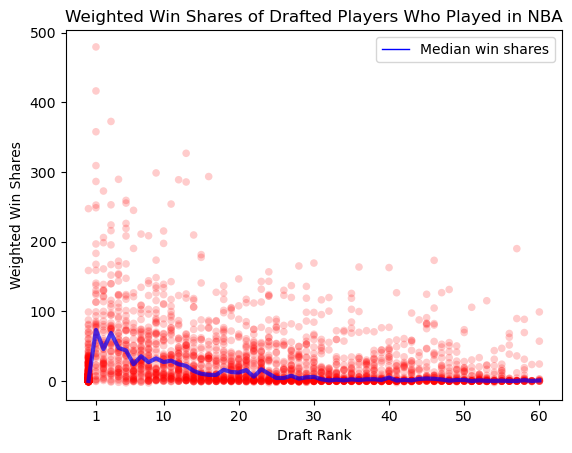

<Figure size 800x600 with 0 Axes>

In [48]:
conn = sqlite3.connect(FILE_PATH_TO_COMPILED_DATA+'nba_data.db')

# Read tables into DataFrames
career_df = pd.read_sql_query('SELECT Player, Rank, Impact FROM career', conn)

career_df = career_df.sort_values(by=['Rank'])

# Calculate median win shares for each rank
median_impact = career_df.groupby('Rank')['Impact'].median()

# Set the tick values and labels
plt.xticks([1, 10, 20, 30, 40, 50, 60], 
           ["1", "10", "20", "30", "40", "50", "60"])

thinkplot.Scatter(xs = career_df["Rank"], ys = career_df["Impact"], color = "red")

# Plot horizontal lines at the median win shares for each rank
thinkplot.Plot(career_df["Rank"], median_impact[career_df["Rank"]], color="blue")

# Add the legend
thinkplot.Config(xlabel="Draft Rank", ylabel="Weighted Win Shares", legend=True, legend_labels=["Median win shares"], label_color="blue")

plt.title("Weighted Win Shares of Drafted Players Who Played in NBA")

# Add a legend for the blue line
# Create a Line2D object for the blue line
blue_line = Line2D([0], [0], color="blue", lw=1)
plt.legend([blue_line], ["Median win shares"], loc="upper right")
plt.savefig("images/Draft_Rank_Vs_WWS1.png")

thinkplot.Show()

Clearly, while the median of drafted players is a gentle sloping curve, there are many outliers, including some players who have nearly 200 weighted win shares who are drafted after 50. It is clear that late drafted players can sometimes have very impactful careers in the NBA. Note also that there is also a column left of 1 for undrafted players who have also contributed to franchise success.

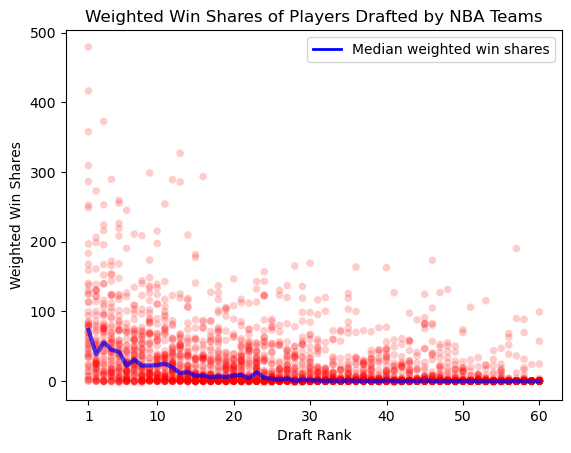

<Figure size 800x600 with 0 Axes>

In [49]:
# Filter the DataFrame to exclude rows where 'Rank' is 0 (undrafted players)
only_drafted_df = career_df[career_df['Rank'] != 0].copy()
undrafted_df = career_df[career_df['Rank'] == 0].copy()

# Get the count of players for each rank in the filtered DataFrame
successful_picks = only_drafted_df['Rank'].value_counts()

# Get the maximum number of players for any rank
max_players = successful_picks.max()

# Create a DataFrame with dummy records for each rank
dummy_data = {'Rank': [], 'Player': [], 'Impact': []}
for rank in successful_picks.index:
    num_players = successful_picks[rank]
    dummy_rows = max_players - num_players
    if dummy_rows > 0:
        dummy_data['Rank'].extend([rank] * dummy_rows)
        dummy_data['Player'].extend([''] * dummy_rows)
        dummy_data['Impact'].extend([0] * dummy_rows)

dummy_df = pd.DataFrame(dummy_data)

# Merge the original DataFrame and the dummy DataFrame
padded_df = pd.concat([only_drafted_df, dummy_df], ignore_index=True)

# Sort the merged DataFrame by rank
padded_df = padded_df.sort_values(by='Rank')

# Calculate median impact for each rank
padded_median_impact = padded_df.groupby('Rank')['Impact'].median()

# Set the tick values and labels
plt.xticks([1, 10, 20, 30, 40, 50, 60], 
           ["1", "10", "20", "30", "40", "50", "60"])

thinkplot.Scatter(xs = padded_df["Rank"], ys = padded_df["Impact"], color = "red")

# Plot horizontal lines at the median win shares for each rank
thinkplot.Plot(padded_df["Rank"], padded_median_impact[padded_df["Rank"]], color="blue")

plt.title("Weighted Win Shares of Players Drafted by NBA Teams")

# Add the legend
thinkplot.Config(xlabel="Draft Rank", ylabel="Weighted Win Shares", legend=True, legend_labels=["Median weighted win shares"], label_color="blue")

# Add a legend for the blue line
# Create a Line2D object for the blue line
blue_line = Line2D([0], [0], color="blue", lw=2)
plt.legend([blue_line], ["Median weighted win shares"], loc="upper right")
plt.savefig("images/Draft_Rank_Vs_WWS2.png")

thinkplot.Show()

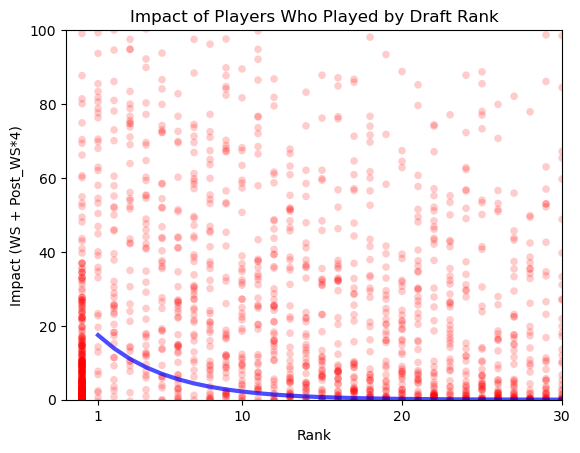

<Figure size 800x600 with 0 Axes>

In [50]:
padded_ranks, padded_impacts = padded_df['Rank'], padded_df['Impact'].clip(lower=0.000001)
log_padded_impacts = np.log10(padded_impacts)

# Use least squares to find the line that fits the least squares.
padded_intercept, padded_slope = thinkstats2.LeastSquares(padded_ranks, log_padded_impacts)
fit_xs, fit_ys = thinkstats2.FitLine(padded_ranks, padded_intercept, padded_slope)

# Set the tick values and labels
plt.xticks([1, 10, 20, 30, 40, 50, 60], 
           ["1", "10", "20", "30", "40", "50", "60"])

# Scatterplot of heights (x) and log of weights (y)
# Include undrafted on the scatterplot
thinkplot.Scatter(xs = career_df["Rank"], ys = career_df["Impact"], color = "red")
# Plot the line on the least squares fit.
thinkplot.Plot(fit_xs, 10 ** fit_ys, color='blue')

plt.savefig("images/Draft_Rank_Vs_WWS3.png")

thinkplot.Show(title='Impact of Players Who Played by Draft Rank',
                xlabel='Rank',
                   ylabel='Impact (WS + Post_WS*4)',
                      xlim=(-1, 30),
                       ylim=(0, 100))

The above graphs take into account players drafted who never played in the NBA. It is even clearer in the zoomed thinned-line graph that the median impact of a draft pick diminishes very quickly. This fact motivates some teams to play poorly to obtain an early pick, however even the first picks are not guaranteed to be beneficial.